In [1]:
from azureml.core import Workspace
ws = Workspace.from_config()

In [2]:
ws

Workspace.create(name='xm-ml-workspace', subscription_id='be564fde-136b-4709-b7b6-abfc0bdfc134', resource_group='xm-ml')

In [33]:
from azureml.core import Experiment
experiment = Experiment(workspace=ws, name="EstimatedShipment")

In [34]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import datetime
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib

import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.train.automl import AutoMLConfig
from azureml.core import Workspace
from azureml.core.model import Model
from azureml.core import Experiment
from azureml.core.webservice import Webservice
from azureml.core.image import ContainerImage
from azureml.core.webservice import AciWebservice
from azureml.core.conda_dependencies import CondaDependencies

import collections
from sklearn.model_selection import train_test_split
import pickle as pkl
import logging
import azureml.dataprep as dprep 
from azureml.core import Dataset

In [35]:
data_df = pd.read_csv('orderduration_train.csv')
test_df= pd.read_csv('orderduration_test.csv')

In [36]:
data_df.head()

,SALES_CHANNEL,TOTAL_PRICE,FINAL_RESULT,HOUR_OF_DAY,ACTIVE_WATCH_DURATION_MINS,ORDER_HOLD_DURATION_MINS,ACCOUNT_OPEN_TO_ORDER_MINS,START_TO_CASECLOSE_MINS,CASECLOSE_TO_ORDERCLOSE_MINS,CASEOPEN_TO_CASECLOSE_MINS,ORDER_RISK_LABEL,Risk Label,START_TO_CLOSE_MINS
0,ONLINE,631.56,GREEN,0,nan,10.77,233555.88,nan,nan,nan,0,Good,2421.68
1,TELESALES,126.96,GREEN,19,nan,22.35,19.82,nan,nan,nan,0,Good,1634.05
2,TELESALES,1401.76,RED,23,19.30,22.05,305.78,4330.95,2988.13,4292.47,1,Fraud,1342.82
3,TELESALES,0.00,RED,14,nan,nan,9.83,nan,nan,nan,0,Good,1860.17
4,ONLINE,1337.42,RED,12,17.93,20.18,1025688.28,3650.92,nan,3626.18,1,Fraud,nan


In [10]:
data_df.shape

(96458, 13)

In [11]:
test_df.shape

(36997, 13)

In [12]:
data_df.isnull().sum()

SALES_CHANNEL                       0
TOTAL_PRICE                         0
FINAL_RESULT                        0
HOUR_OF_DAY                         0
ACTIVE_WATCH_DURATION_MINS      54288
ORDER_HOLD_DURATION_MINS        10578
ACCOUNT_OPEN_TO_ORDER_MINS          0
START_TO_CASECLOSE_MINS         82875
CASECLOSE_TO_ORDERCLOSE_MINS    88739
CASEOPEN_TO_CASECLOSE_MINS      82875
ORDER_RISK_LABEL                    0
Risk Label                          0
START_TO_CLOSE_MINS              7840
dtype: int64

In [13]:
test_df.isnull().sum()

SALES_CHANNEL                       0
TOTAL_PRICE                         0
FINAL_RESULT                        0
HOUR_OF_DAY                         0
ACTIVE_WATCH_DURATION_MINS      17479
ORDER_HOLD_DURATION_MINS            0
ACCOUNT_OPEN_TO_ORDER_MINS          0
START_TO_CASECLOSE_MINS         32198
CASECLOSE_TO_ORDERCLOSE_MINS    34321
CASEOPEN_TO_CASECLOSE_MINS      32198
ORDER_RISK_LABEL                    0
Risk Label                          0
START_TO_CLOSE_MINS              2492
dtype: int64

In [37]:
data_df.fillna(data_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)

In [38]:
data_df.head()

,SALES_CHANNEL,TOTAL_PRICE,FINAL_RESULT,HOUR_OF_DAY,ACTIVE_WATCH_DURATION_MINS,ORDER_HOLD_DURATION_MINS,ACCOUNT_OPEN_TO_ORDER_MINS,START_TO_CASECLOSE_MINS,CASECLOSE_TO_ORDERCLOSE_MINS,CASEOPEN_TO_CASECLOSE_MINS,ORDER_RISK_LABEL,Risk Label,START_TO_CLOSE_MINS
0,ONLINE,631.56,GREEN,0,19.51,10.77,233555.88,4091.53,4591.62,4040.29,0,Good,2421.68
1,TELESALES,126.96,GREEN,19,19.51,22.35,19.82,4091.53,4591.62,4040.29,0,Good,1634.05
2,TELESALES,1401.76,RED,23,19.30,22.05,305.78,4330.95,2988.13,4292.47,1,Fraud,1342.82
3,TELESALES,0.00,RED,14,19.51,36.85,9.83,4091.53,4591.62,4040.29,0,Good,1860.17
4,ONLINE,1337.42,RED,12,17.93,20.18,1025688.28,3650.92,4591.62,3626.18,1,Fraud,7083.53


In [39]:
exp = Experiment(ws, name='EstimatedShipment')
run = exp.start_logging()
run.log("Experiment start time", str(datetime.datetime.now()))

In [40]:
dur = data_df
X = dur[['CASECLOSE_TO_ORDERCLOSE_MINS']]
X = pd.get_dummies(data=X, drop_first=True)
Y = dur['START_TO_CLOSE_MINS']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

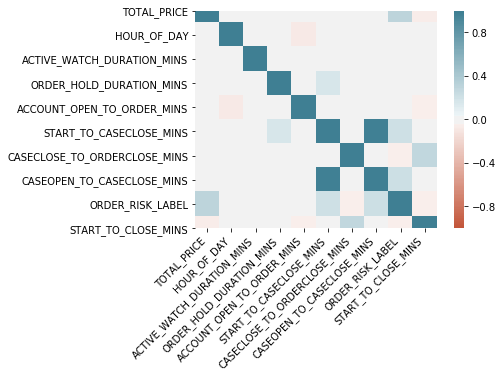

In [41]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = dur.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [42]:
filename = 'outputs/estimated_shipment.pkl'
joblib.dump(lm, filename)

['outputs/estimated_shipment.pkl']

In [47]:
run.log('Intercept :', lm.intercept_)
run.log('Slope :', lm.coef_[0])
run.log_image("ROC", pl)
run.log("Experiment end time", str(datetime.datetime.now()))
run.complete()

AttributeError: module 'matplotlib.pyplot' has no attribute 'tell'